In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mca2 = pd.read_csv("/Users/jxhn/Desktop/IRONHACK/Week_1/Day_4/Morning/Jahn-lab-dw-data-structuring-and-combining/mca.csv")
mca2 = mca2.drop('Unnamed: 0', axis=1)
mca2 = mca2.drop('unnamed:_0', axis=1)
mca2.head()

,customer,state,customer_lifetime_value,response,coverage,education,datetime,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,february
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,january
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,february
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,january
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,january


In [3]:
df_numeric = mca2.select_dtypes(include=[np.number]).copy()
df_categorical = mca2.select_dtypes(include=[object]).copy()

In [4]:
df_categorical.head()

,customer,state,response,coverage,education,datetime,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,unknown,february
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,unknown,january
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,february
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,january
4,QA50777,Oregon,No,Premium,Bachelor,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,unknown,january


In [5]:
df_numeric.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645


In [6]:
df_numeric.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly_premium_auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10910.0,15.149071,9.783520,0.000000,7.000000,15.000000,23.000000,35.000000
months_since_policy_inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10910.0,0.384256,0.885589,0.000000,0.000000,0.000000,0.384256,5.000000
number_of_policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


In [8]:
print(mca2['customer_lifetime_value'].skew())
print("which is outside the [-2,2] range.")

3.001047336521593
which is outside the [-2,2] range.


In [9]:
print(mca2['income'].skew())
print("which is outside the [-2,2] range.")

0.2858390930328839
which is outside the [-2,2] range.


In [10]:
print(mca2['monthly_premium_auto'].skew())
print("which is outside the [-2,2] range.")

2.1165667204838683
which is outside the [-2,2] range.


In [11]:
print(mca2['months_since_last_claim'].skew())
print("which is outside the [-2,2] range.")

0.27852590912867176
which is outside the [-2,2] range.


In [12]:
print(mca2['months_since_policy_inception'].skew())
print("which is outside the [-2,2] range.")

0.03364188297216199
which is outside the [-2,2] range.


In [13]:
print(mca2['number_of_open_complaints'].skew())
print("which is outside the [-2,2] range.")

2.8887622619249638
which is outside the [-2,2] range.


In [14]:
print(mca2['number_of_policies'].skew())
print("which is inside the [-2,2] range.")

1.2425740654009907
which is inside the [-2,2] range.


In [15]:
print(mca2['total_claim_amount'].skew())
print("which is inside the [-2,2] range.")

1.7292858027409794
which is inside the [-2,2] range.


In [16]:
def remove_outliers(data, column_name):
    q1 = np.percentile(data[column_name], 25)
    q3 = np.percentile(data[column_name], 75)
    iqr = q3 - q1

    upper_whisker = q3 + 1.5 * iqr
    lower_whisker = q1 - 1.5 * iqr

    filtered_numeric = data[(data[column_name] >= lower_whisker) & (data[column_name] <= upper_whisker)]
    
    return filtered_numeric

In [17]:
filtered_numeric = remove_outliers(df_numeric, 'customer_lifetime_value')

In [18]:
filtered_numeric = remove_outliers(df_numeric, 'income')

In [19]:
filtered_numeric = remove_outliers(df_numeric, 'monthly_premium_auto')

In [20]:
filtered_numeric = remove_outliers(df_numeric, 'months_since_last_claim')

In [21]:
filtered_numeric = remove_outliers(df_numeric, 'months_since_policy_inception')

In [22]:
filtered_numeric = remove_outliers(df_numeric, 'number_of_open_complaints')

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/var/folders/h1/sm0yz6nx7m9cgsn8627qx6c00000gn/T/ipykernel_67549/2086449274.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=mca2.corr(method='pearson')  # default


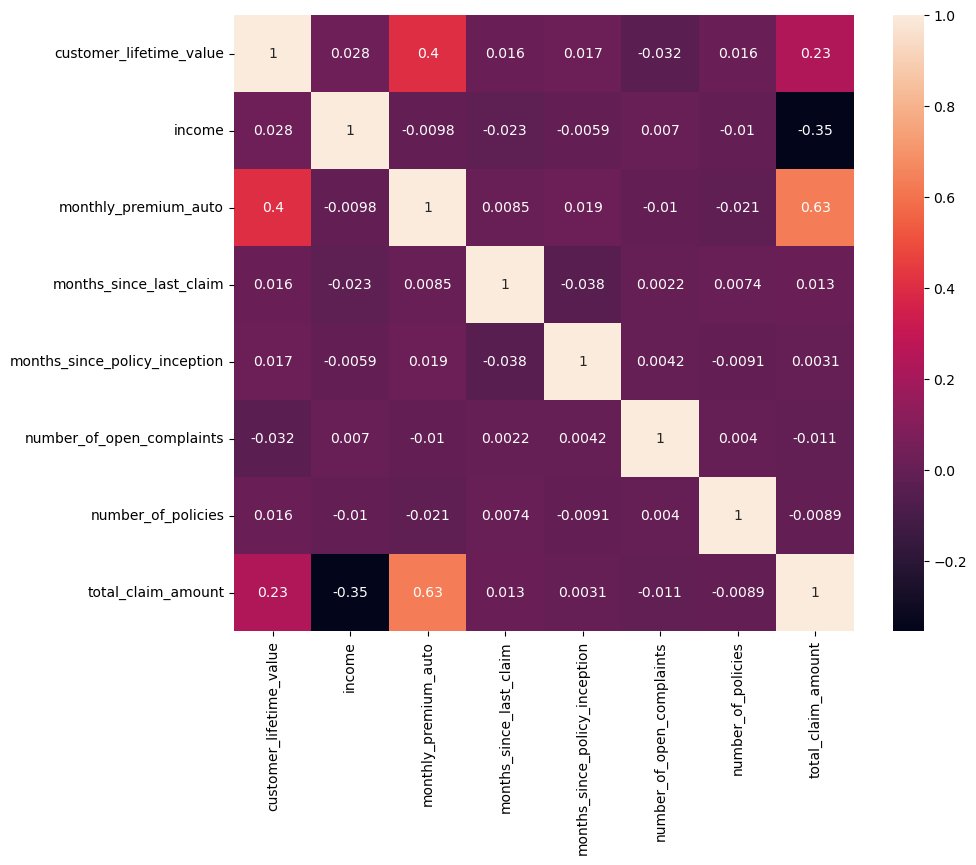

In [25]:
corr_matrix=mca2.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [26]:
y = mca2['total_claim_amount']
X = mca2.drop(['total_claim_amount'], axis=1)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(['object'])
X_test_cat  = X_test_df.select_dtypes(['object'])

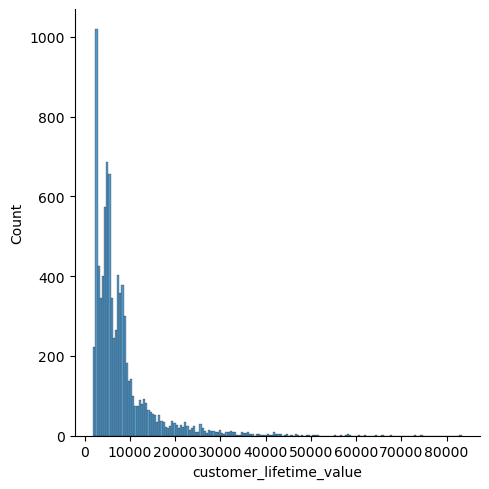

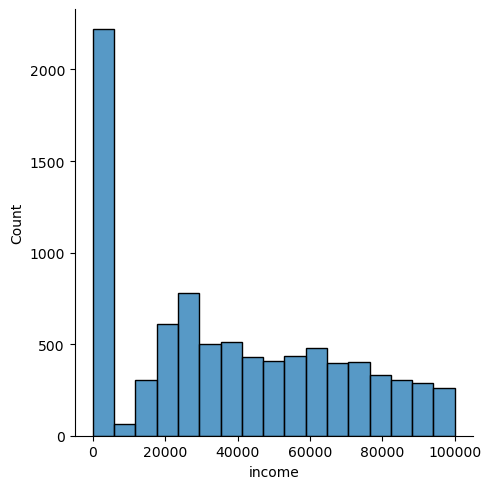

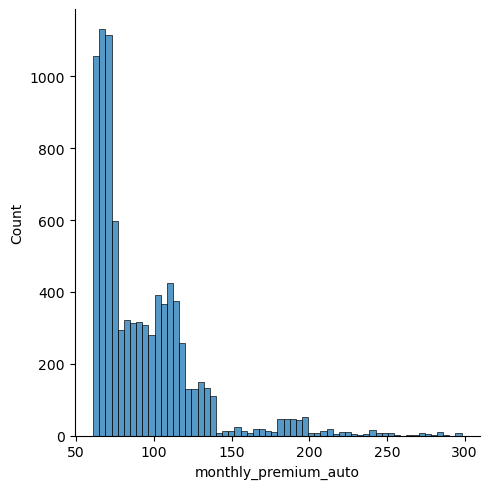

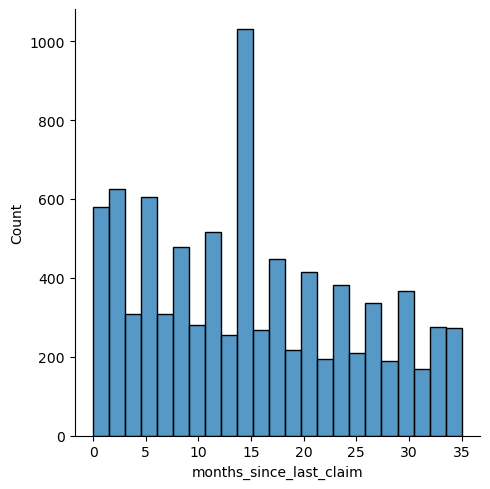

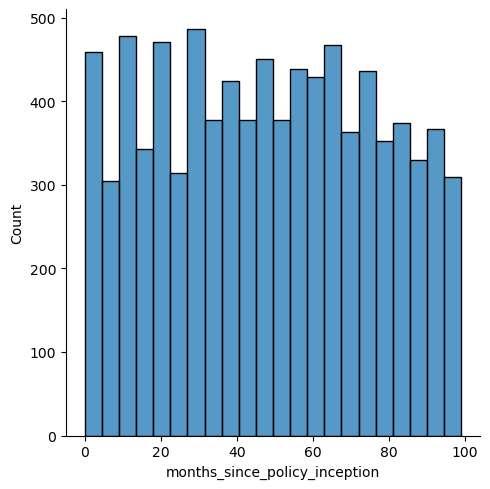

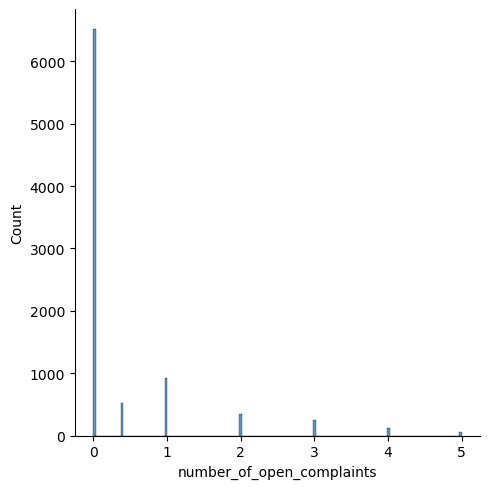

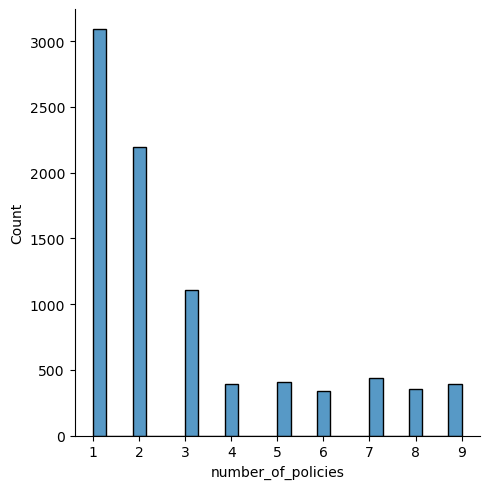

In [29]:
sns.displot(X_train_num['customer_lifetime_value'])
plt.show()

sns.displot(X_train_num['income'])
plt.show()

sns.displot(X_train_num['monthly_premium_auto'])
plt.show()

sns.displot(X_train_num['months_since_last_claim'])
plt.show()

sns.displot(X_train_num['months_since_policy_inception'])
plt.show()

sns.displot(X_train_num['number_of_open_complaints'])
plt.show()

sns.displot(X_train_num['number_of_policies'])
plt.show()

In [30]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformer.fit(X_train_num)
X_train_scaled = transformer.transform(X_train_num)
X_test_scaled  = transformer.transform(X_test_num)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_test_num.columns)
X_train_scaled.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.033983,0.000000,0.004219,0.742857,0.626263,0.0,0.250
1,0.103048,0.963553,0.278481,0.542857,0.121212,0.0,0.250
2,0.036541,0.188696,0.274262,0.114286,0.626263,0.0,0.000
3,0.061978,0.000000,0.029536,0.685714,0.313131,0.0,0.125
4,0.007055,0.638721,0.004219,0.742857,0.818182,0.0,0.000


In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first') 
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()

X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=encoder.get_feature_names_out())
X_train_encoded_df.head()

,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,...,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_unknown,vehicle_type_unknown,month_january
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [32]:
X_train_treated_df = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)
X_train_treated_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_AA11235,customer_AA16582,customer_AA30683,...,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_unknown,vehicle_type_unknown,month_january
0,0.033983,0.000000,0.004219,0.742857,0.626263,0.0,0.250,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.103048,0.963553,0.278481,0.542857,0.121212,0.0,0.250,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.036541,0.188696,0.274262,0.114286,0.626263,0.0,0.000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.061978,0.000000,0.029536,0.685714,0.313131,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.007055,0.638721,0.004219,0.742857,0.818182,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8723,0.023484,0.000000,0.198312,0.200000,0.575758,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
8724,0.023553,0.386583,0.156118,0.342857,0.838384,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8725,0.073103,0.000000,0.033755,0.142857,0.787879,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8726,0.037779,0.000000,0.037975,0.514286,0.747475,0.0,0.250,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [33]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_treated_df)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_treated_df.columns)

In [34]:
from sklearn.linear_model import LinearRegression

# Assuming you have the corresponding target variable y_train

# Create an instance of the LinearRegression model
regression_model = LinearRegression()

# Fit the model to the scaled training data
regression_model.fit(X_train_scaled_df, y_train)

# Get the coefficients and intercept of the linear regression model
coefficients = regression_model.coef_
intercept = regression_model.intercept_